In [12]:
import os,sys
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statannot import add_stat_annotation

%matplotlib inline 
sns.set_style('darkgrid')

In [13]:
data_file = 'experiment_result.xlsx'
df = pd.read_excel(data_file,sheet_name='high_tas',index_col=0)

embedding_df = pd.read_csv('embedding_size_tas.csv')
few_df = pd.read_csv('data_size_tas.csv')
print(df)

     Fold  Train_sig  Test_sig  Train_drug  Test_drug  MOAEMB  DrSim  SigMat  \
ALL     0      28804     12205         401        192    6700   6060    6126   
ALL     1      27989     13020         391        202    6824   5808    6299   
ALL     2      25225     15784         394        199    8904   8214    8652   

       RF  GSEA  ssCmap  Xcosine  Xsum  L1000CDS  Euclidean  Jaccard  Random  
ALL  5947  5121    4790     4835  3280      4777       4742     5051     440  
ALL  5509  4836    4722     5157  3992      5074       4940     5509     527  
ALL  7963  7264    7112     7161  5927      7092       7027     7614     672  


In [14]:
### all fold
methods = ['MOAEMB','DrSim','SigMat','RF',
           'GSEA','ssCmap','Xcosine','Xsum',
           'Euclidean','L1000CDS','Jaccard','Random']
methods_belong = {'MOAEMB':'MOAEMB','DrSim':'Machine learning','SigMat':'Machine learning','RF':'Machine learning',
           'GSEA':'Biology','ssCmap':'Biology','Xcosine':'Biology','Xsum':'Biology',
           'Euclidean':'Distance','L1000CDS':'Distance','Jaccard':'Distance','Random':'Random'}

cols = []
cols_kind = ['MOAEMB','Machine learning','Biology','Distance','Random']
col_pal = sns.color_palette("colorblind")
for method in methods:
    for i in range(len(cols_kind)):
        color = col_pal[i]
        kind = cols_kind[i]
        if methods_belong[method] == kind:
            cols.append(color)
print(df)
df = df.loc[['ALL']]

acc_sig = []
acc_val = []
tests = []
labels = []
folds = []
kinds = []
for method in methods:
    for fold in [0,1,2]:
        acc = df[df['Fold']==fold][method].values[0]
        acc_sig.append(acc)
        Test = df[df['Fold']==fold]['Test_sig'].values[0]
        tests.append(Test)
        acc_val.append(acc/Test)
        labels.append(method)
        folds.append(fold)
        kinds.append(methods_belong[method])
plot_df = pd.DataFrame()
plot_df['test'] = tests
plot_df['method'] = labels
plot_df['fold'] = folds
plot_df['correct signatures'] = acc_sig
plot_df['accuracy'] = acc_val
plot_df['kind'] = kinds
print(plot_df)

     Fold  Train_sig  Test_sig  Train_drug  Test_drug  MOAEMB  DrSim  SigMat  \
ALL     0      28804     12205         401        192    6700   6060    6126   
ALL     1      27989     13020         391        202    6824   5808    6299   
ALL     2      25225     15784         394        199    8904   8214    8652   

       RF  GSEA  ssCmap  Xcosine  Xsum  L1000CDS  Euclidean  Jaccard  Random  
ALL  5947  5121    4790     4835  3280      4777       4742     5051     440  
ALL  5509  4836    4722     5157  3992      5074       4940     5509     527  
ALL  7963  7264    7112     7161  5927      7092       7027     7614     672  
     test     method  fold  correct signatures  accuracy              kind
0   12205     MOAEMB     0                6700  0.548955            MOAEMB
1   13020     MOAEMB     1                6824  0.524117            MOAEMB
2   15784     MOAEMB     2                8904  0.564116            MOAEMB
3   12205      DrSim     0                6060  0.496518  Machi

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MOAEMB v.s. GSEA: t-test independent samples, P_val=1.030e-02 stat=4.565e+00
GSEA v.s. Jaccard: t-test independent samples, P_val=5.345e-01 stat=-6.788e-01
MOAEMB v.s. Jaccard: t-test independent samples, P_val=1.229e-02 stat=4.337e+00


<ipython-input-23-5c53cb0966b1>:44: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(x='epoch',y='acc',data=margin_df,hue='margin',palette=pal,ax=ax1).set(


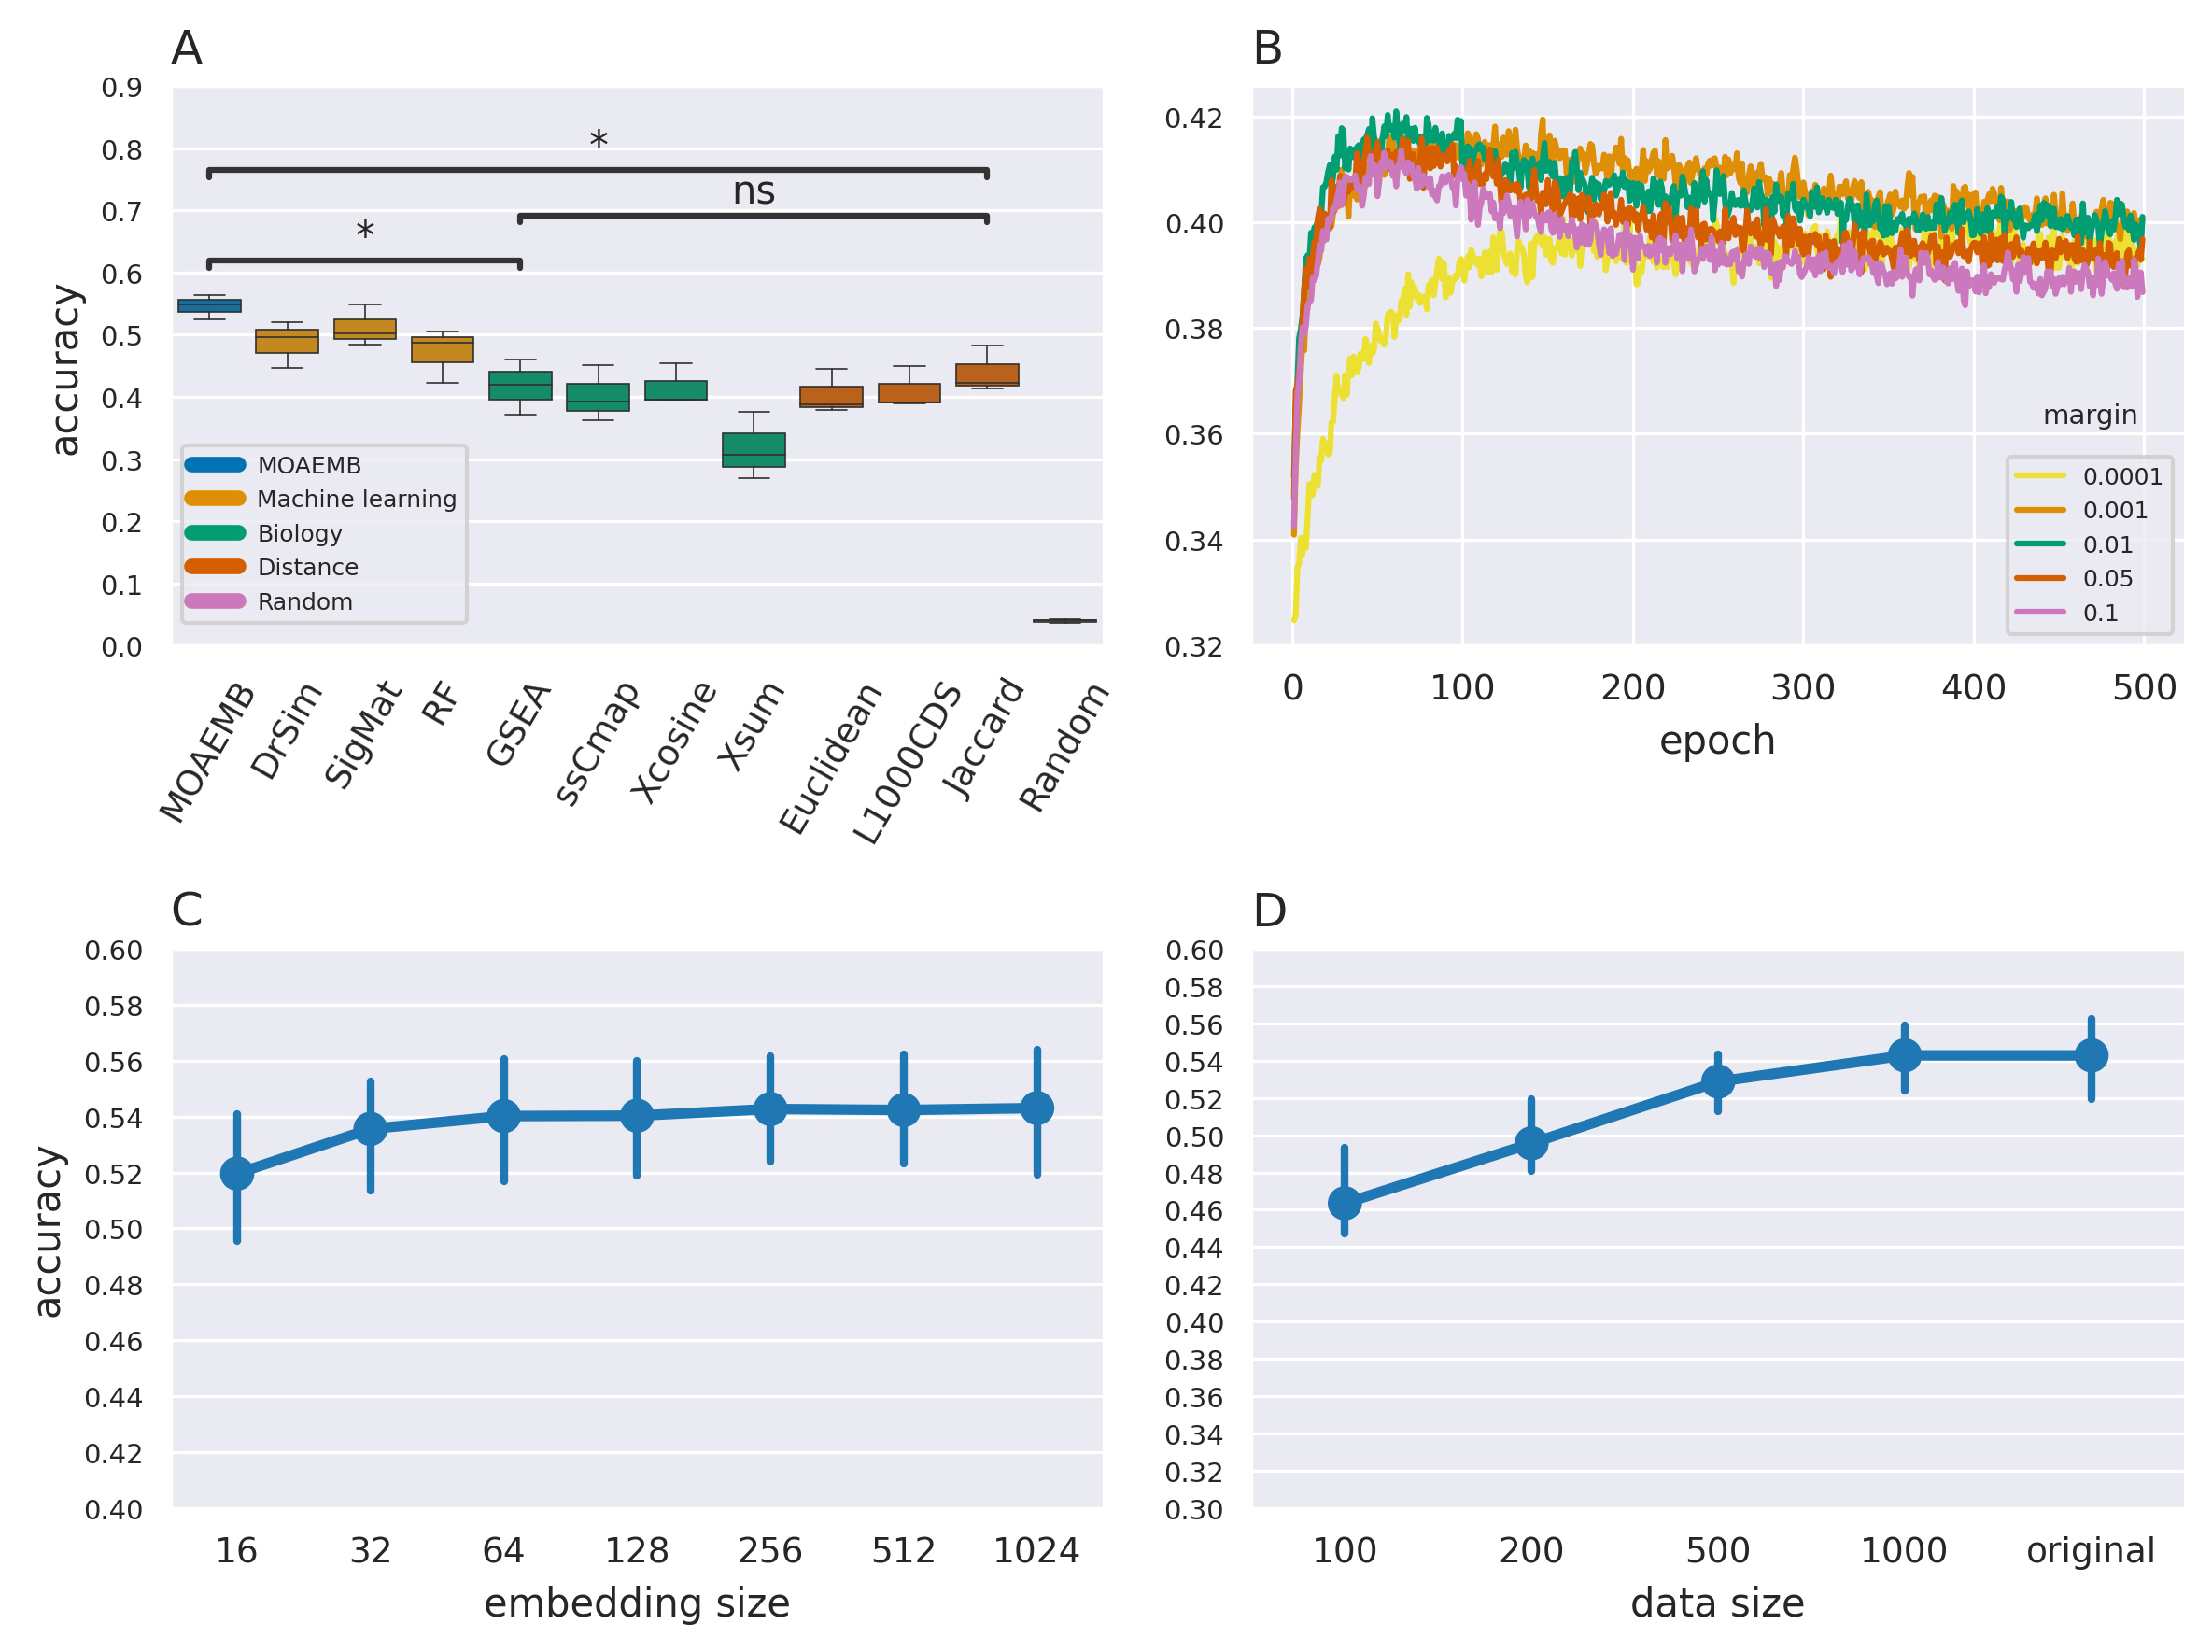

In [23]:
my_dpi=300
plt.figure(figsize=(8,6),dpi=my_dpi)
##################
# accuracy
ax1 = plt.subplot(2,2,1)
# sns.barplot(x='method',y='correct signatures',data=plot_df,palette=cols,ax=ax1,errwidth=2).set(
#     xlabel=None)
# sns.barplot(x='method',y='accuracy',data=plot_df,palette=cols,ax=ax1,errwidth=2).set(xlabel=None)
sns.boxplot(x='method',y='accuracy',data=plot_df,palette=cols,ax=ax1,linewidth=0.4).set(xlabel=None)

# ax1.legend(custom_lines, cols_kind,bbox_to_anchor=(0, 0.2), loc='center left',fontsize=6)
test_results = add_stat_annotation(ax1, data=plot_df, x='method',y='accuracy', order=methods,
                                   box_pairs=[("MOAEMB", "GSEA")
                                              ,('GSEA','Jaccard'),("MOAEMB", "Jaccard")],
                                   test='t-test_ind', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=2)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9],fontsize=7)
custom_lines = [Line2D([0], [0], color=col_pal[0], lw=4),
                Line2D([0], [0], color=col_pal[1], lw=4),
                Line2D([0], [0], color=col_pal[2], lw=4),
                Line2D([0], [0], color=col_pal[3], lw=4),
                Line2D([0], [0], color=col_pal[4], lw=4)]
ax1.legend(custom_lines, cols_kind,bbox_to_anchor=(0, 0.2), loc='center left',fontsize=6)
plt.title('A',loc='left')
plt.yticks(fontsize=7)
plt.xticks(rotation=60,fontsize=9)

##################
# accuracy
ax1 = plt.subplot(2,2,2)
# margine size
margin_list = [0.0001,0.001,0.01,0.05,0.1]
data_dir = '/home/jlk/Project/111_Cmap/MOA/src/result_margin'
margin_df = pd.DataFrame()
for m in margin_list:
    file = '{}/all_fold_{}_0.csv'.format(data_dir,m)
    df = pd.read_csv(file)
    df['acc'] = df['find']/df['sample_num']
    df['margin'] = m
    margin_df = pd.concat([margin_df,df])

pal = sns.color_palette("colorblind")
pal[0] = pal[8]
sns.lineplot(x='epoch',y='acc',data=margin_df,hue='margin',palette=pal,ax=ax1).set(
    ylabel='')
ax1.legend(loc='best',fontsize=6)
plt.title('B',loc='left')
plt.text(440, 0.362, 'margin', fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=9)

##################
# embedding size
ax2 = plt.subplot(2,2,3)
fig = sns.pointplot(x='embedding',y='per',data=embedding_df,ax=ax2,errwidth=2).set(
    xlabel='embedding size',ylabel='accuracy')
plt.title('C',loc='left')
plt.yticks([.4,.42,0.44,0.46,0.48,0.50,0.52,0.54,0.56,0.58,0.60],fontsize=7)
plt.xticks(fontsize=9)

##################
# data size
ax3 = plt.subplot(2,2,4)
fig = sns.pointplot(x='few',y='per',data=few_df,ax=ax3,errwidth=2).set(
    xlabel='data size',ylabel='')
plt.title('D',loc='left')
plt.yticks([0.30,0.32,.34,.36,.38,.4,.42,0.44,0.46,0.48,0.50,0.52,0.54,0.56,0.58,0.60],fontsize=7)
plt.xticks(fontsize=9)

plt.tight_layout()
# plt.show()
plt.savefig('Figure2.jpg')